# Linear Regression with Multiple Variables

1. [Load Data](#data)
2. [Feature Normalization](#feature)
2. [Initialization of Parameters](#initial)
3. [Compute Cost](#cost)
4. [Gradient Descent](#gradient)
5. [Make Predictions](#predict)
6. [Merge All Functions](#merge)
7. [Normal Equation Method](#normal)

## Load Data <a name="data"></a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pylab
dat = np.loadtxt('dataset/ex1data2.txt', delimiter = ',')

In [6]:
X = dat[:, :2]
y = dat[:, [2]]
print("Number of examples: {}".format(y.shape[0]))
print("Number of features: {}".format(X.shape[1]))

Number of examples: 47
Number of features: 2


## Feature Normalization <a name="feature"></a>

- speed up gradient descent
- $x_i \leftarrow \frac{x_i-\mu_i}{s_i},  s_i= \text{ range or SD}$

In [73]:
def featureNormalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    Xnorm = (X - mu)/sigma
    return Xnorm, mu, sigma

Add intercept

In [74]:
def addintercept(X):
    N = X.shape[0]
    X = np.hstack((np.ones((N, 1)), X))
    return X

## Initialization of Parameters<a name="initial"></a>

In [75]:
def initialwzeros(dim):
    return np.zeros((dim, 1))

## Compute Cost <a name="cost"></a>

- cost (vectorization)
$$
J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y)
$$

In [76]:
def cost(X, y, theta):
    resid = np.dot(X, theta) - y
    return np.mean(resid ** 2)/2

## Gradient Descent <a name="gradient"></a>

$$
\theta_j \leftarrow \theta_j -\alpha\frac{\partial}{\partial \theta_j}J(\mathbf{\theta})
$$

- vectorization:
$$
\Rightarrow \mathbf{\theta} \leftarrow  \mathbf{\theta}-\alpha\frac{d}{d\mathbf{\theta}}J(\mathbf{\theta})=\mathbf{\theta}-\frac{\alpha}{N}X^T (X\theta -y)
$$

In [77]:
def gradientDescent(X, y, theta, learning_rate, iterations):
    J = []
    m = len(y)
    for i in range(iterations):
        resid = np.dot(X, theta) - y
        theta -= learning_rate/m*np.dot(X.T, resid)
        J.append(cost(X, y, theta))
    return theta, J

## Make Predictions <a name="predict"></a>

In [78]:
def predict(Xnew, mu, sigma, theta):
    Xnew = (Xnew - mu)/sigma
    Xnew = addintercept(Xnew)
    return np.dot(Xnew, theta)

## Merge all Function <a name="merge"></a>

In [88]:
def model(X, y, iterations = 800, learning_rate = 0.03):
    # feature normalizing
    [Xnorm, mu, sigma] = featureNormalize(X)
    Xnorm = addintercept(Xnorm)
    
    # initializing params
    theta = initialwzeros(Xnorm.shape[1])
    
    # optimization with gradient descent
    [theta, cost_hist] = gradientDescent(Xnorm, y, theta, learning_rate, iterations)
    
    d = {"costs": cost_hist,
         "mu": mu,
         "sigma": sigma,
         "theta": theta,
         "learning_rate": learning_rate,
         "iterations": iterations}
    return d

In [89]:
d = model(X, y)

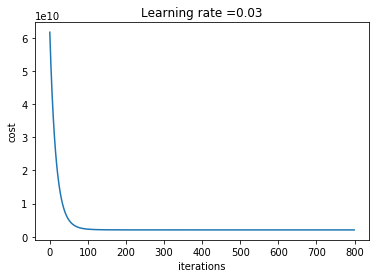

In [90]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [91]:
Xnew = np.array([[1650, 3]])
predict(Xnew, d['mu'], d['sigma'], d['theta'])

array([[293081.77251496]])

## Normal Equation Method <a name ="normal"></a>

$$\hat{\mathbf{\theta}} = (X^TX)^{-1}X^T\mathbf{y}$$

In [83]:
def normalEqn(X, y):
    return np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, y))

In [86]:
def predictwNormalEqn(Xnew, X, y):
    X = addintercept(X)
    theta = normalEqn(X, y)
    
    Xnew = addintercept(Xnew)
    return np.dot(Xnew, theta)

In [87]:
predictwNormalEqn(Xnew, X, y)

array([[293081.46433489]])